In [26]:
#Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data

df = pd.DataFrame(x, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
#Перевірити назви стовпців та типи даних.
df.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64


In [28]:
#Перевірити наявність пропущених значень.
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [29]:
#Дослідити розмір даних.
df.shape

(150, 4)

In [30]:
#Вивести інформацію про датасет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [31]:
#Вивести опис датасету
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


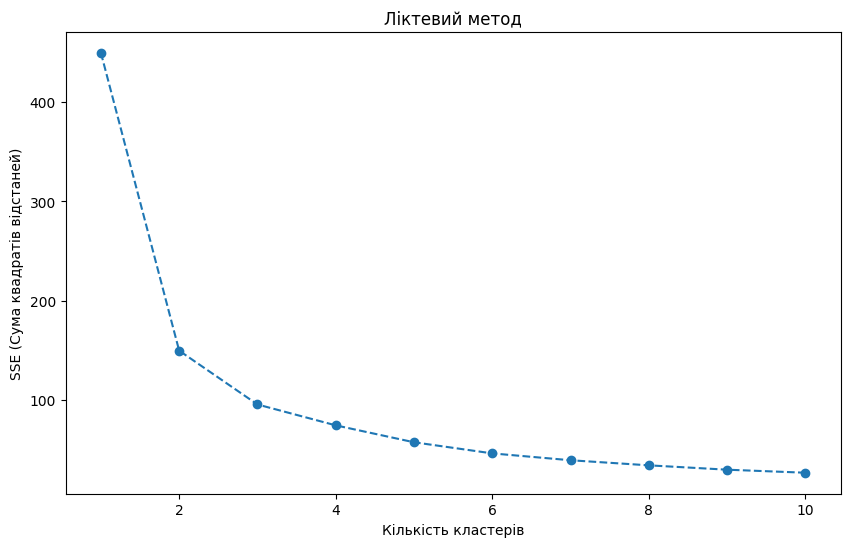

In [33]:
#Методом ліктя визначити оптимальну кількість кластерів.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_2d = pd.DataFrame (X_scaled, columns=iris.feature_names).iloc[:, 1:] # Select all rows and all columns except the first
wcss_2d = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X_2d)
  wcss_2d.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range (1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Ліктевий метод')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE (Сума квадратів відстаней)')
plt.show()

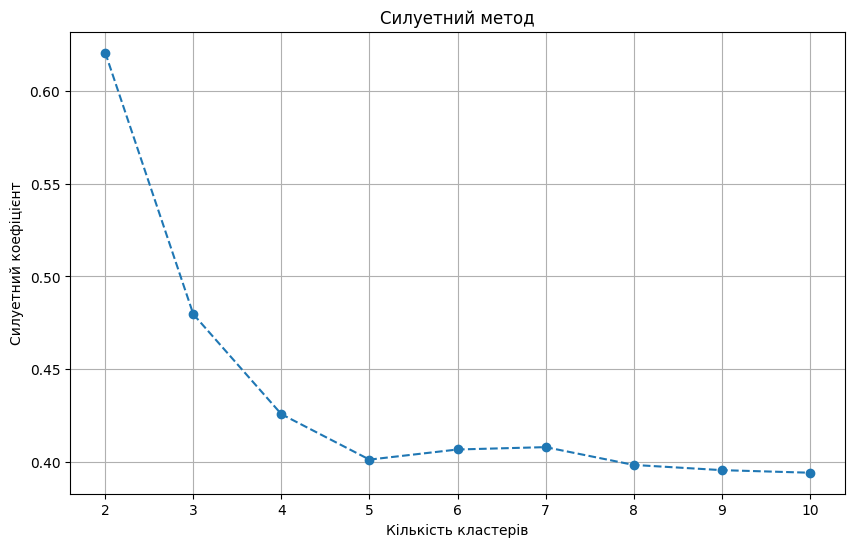

In [35]:
#Методом силуетів визначити оптимальну кількість кластерів.
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  cluster_labels = kmeans.fit_predict(X_2d)
  silhouette_avg = silhouette_score (X_2d, cluster_labels)
  silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Силуетний метод')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.grid(True)
plt.show()

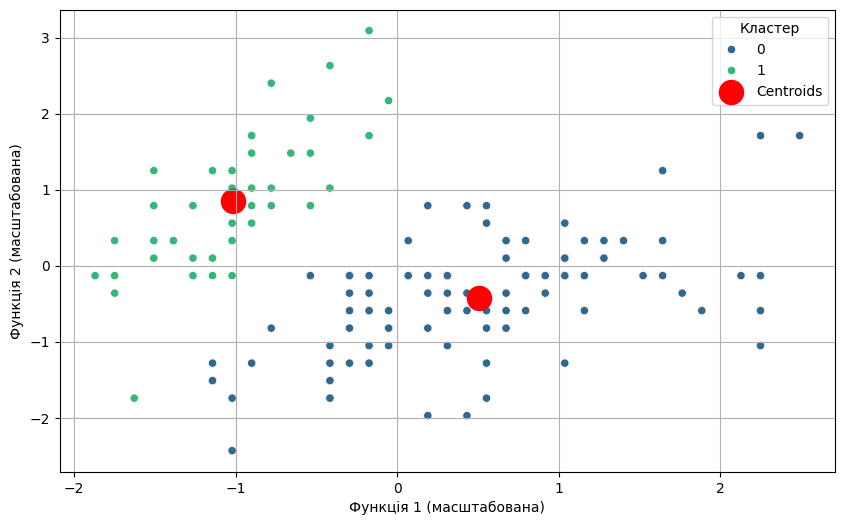

In [36]:
#Візуалізувати кластери.
import seaborn as sns

kmeans = KMeans (n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Функція 1 (масштабована)')
plt.ylabel('Функція 2 (масштабована)')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

In [ ]:
#Висновки: Дані були завантажені з датасету "Ірис" і підготовлені до кластеризації. Для покращення якості кластеризації було застосовано масштабування ознак.
#Алгоритм K-means був застосований для кластеризації даних з кількістю кластерів, заданою на основі різних критеріїв.
#В даному випадку використовувалися 2 кластери.

#Метод ліктя був використаний для визначення оптимальної кількості кластерів. На графіку видно точку, де зменшення суми квадратів відстаней до центроїдів починає сповільнюватися.
#Це дозволяє оцінити оптимальну кількість кластерів.

#Метод силуетів дозволив оцінити якість кластеризації для різної кількості кластерів.
#Силуетний коефіцієнт показує, наскільки добре об'єкти в межах одного кластеру відрізняються від об'єктів в інших кластерах.
#Найвищий силуетний коефіцієнт вказує на оптимальну кількість кластерів.

#Візуалізація кластерів дозволила наочно перевірити якість кластеризації. Вона показала, як дані розподілені між кластерами і де розташовані центри кластерів.
#Візуалізація підтвердила, що обрана кількість кластерів (2) є адекватною для даного датасету.

#Для кластеризації було обрано 2 кластери на основі результатів методу ліктя і силуетного методу.
#Результати кластеризації показали, що дані з різних класів і дійсно поділяються на два класи, що підтверджується візуалізацією.

#Посилання на гітхаб: https://github.com/nastiadzen/Machine-learning